<a href="https://colab.research.google.com/github/susmitamazumdar10/AI-based-indian-license-plate-detection/blob/master/yolo_ALPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rkuo2000/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3390, done.
remote: Total 3390 (delta 0), reused 0 (delta 0), pack-reused 3390
Receiving objects: 100% (3390/3390), 7.02 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (2276/2276), done.
/content/yolov5


In [ ]:
!echo "train: Dataset/train/images" > data/alpr.yaml
!echo "val:   Dataset/train/images" >> data/alpr.yaml

!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml

!cat data/alpr.yaml

train: Dataset/train/images
val:   Dataset/train/images
nc : 1
names: ['license']


In [ ]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [ ]:
FILE_ROOT = "/content/drive/MyDrive/btp-data/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "train/images"
DEST_LABELS_PATH = "train/labels"

In [ ]:
!mkdir -p Dataset/train/labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p Dataset/train
!cp -rf /content/drive/MyDrive/btp-data/images Dataset/train

In [ ]:
!mkdir -p Dataset/val/images
!cp -rf /content/drive/MyDrive/btp-data/images/Cars1*.png Dataset/val/images

In [ ]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]
    
def save_file(img_jpg_file_name, size, img_box):
    classes = ['license']
    save_file_name = DATA_ROOT + DEST_LABELS_PATH + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:                  
        #cls_num = classes.index(box[0]) # find class_id
        cls_num = 0
        new_box = cord_converter(size, box[1:]) # convert box coord into YOLO x,y,w,h

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()

def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    save_file(img_xml_file, [img_w, img_h], img_box)

In [ ]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

NameError: ignored

In [ ]:
!mkdir -p Dataset/val/labels
!cp -rf Dataset/train/labels/Cars1*.txt Dataset/val/labels

In [ ]:
!ls Dataset/train/labels

Cars0.txt    Cars166.txt  Cars231.txt  Cars298.txt  Cars363.txt  Cars429.txt
Cars100.txt  Cars167.txt  Cars232.txt  Cars299.txt  Cars364.txt  Cars42.txt
Cars101.txt  Cars168.txt  Cars233.txt  Cars29.txt   Cars365.txt  Cars430.txt
Cars102.txt  Cars169.txt  Cars234.txt  Cars2.txt    Cars366.txt  Cars431.txt
Cars103.txt  Cars16.txt   Cars235.txt  Cars300.txt  Cars367.txt  Cars432.txt
Cars104.txt  Cars170.txt  Cars236.txt  Cars301.txt  Cars368.txt  Cars43.txt
Cars105.txt  Cars171.txt  Cars237.txt  Cars302.txt  Cars369.txt  Cars44.txt
Cars106.txt  Cars172.txt  Cars238.txt  Cars303.txt  Cars36.txt	 Cars45.txt
Cars107.txt  Cars173.txt  Cars239.txt  Cars304.txt  Cars370.txt  Cars46.txt
Cars108.txt  Cars174.txt  Cars23.txt   Cars305.txt  Cars371.txt  Cars47.txt
Cars109.txt  Cars175.txt  Cars240.txt  Cars306.txt  Cars372.txt  Cars48.txt
Cars10.txt   Cars176.txt  Cars241.txt  Cars307.txt  Cars373.txt  Cars49.txt
Cars110.txt  Cars177.txt  Cars242.txt  Cars308.txt  Cars374.txt  Cars4.txt
Cars111.tx

In [ ]:
!pip install --ignore-installed PyYAML

     |████████████████████████████████| 596 kB 15.9 MB/s 


In [ ]:
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1 MB 1.3 MB/s eta 0:03:55tcmalloc: large alloc 1147494400 bytes == 0x55b368912000 @  0x7f82029c6615 0x55b3300aa17c 0x55b33018a47a 0x55b3300acf9d 0x55b33019ed4d 0x55b330120ec8 0x55b33011ba2e 0x55b3300ae88a 0x55b330120d30 0x55b33011ba2e 0x55b3300ae88a 0x55b33011d719 0x55b33019fb76 0x55b33011cd95 0x55b33019fb76 0x55b33011cd95 0x55b33019fb76 0x55b33011cd95 0x55b3300aece9 0x55b3300f2579 0x55b3300ad902 0x55b330120c4d 0x55b33011ba2e 0x55b3300ae88a 0x55b33011d719 0x55b33011ba2e 0x55b3300ae88a 0x55b33011c8f6 0x55b3300ae7aa 0x55b33011cb4f 0x55b33011ba2e
     |█████████████████████████████▊  | 1055.7 MB 1.2 MB/s eta 0:01:11tcmalloc: large alloc 1434370048 bytes == 0x55b3acf68000 @  0x7f82029c6615 0x55b3300aa17c 0x55b33018a47a 0x55b3300acf9d 0x55b33019ed4d 0x55b330120ec8 0x55b33011ba2e 0x55b3300ae88a 0x55b330120d30 0x55b33011ba2e 0x55b3300ae88a 0x55b33011d719 0x55b33019fb76 0x55b33011cd

In [ ]:
!python train.py --img 416 --batch 32 --epochs 150 --data data/alpr.yaml --cfg models/yolov5s.yaml


Using torch 1.7.0+cu110 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Namespace(adam=False, batch_size=32, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='data/alpr.yaml', device='', epochs=150, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=32, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
NumExpr defaulting to 2 threads.
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 

In [ ]:
!python test.py --weights runs/train/exp/weights/best.pt --data data/alpr.yaml  --img 416 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/alpr.yaml', device='', exist_ok=False, img_size=416, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
Scanning 'Dataset/train/labels.cache' for images and labels... 433 found, 0 missing, 0 empty, 0 corrupted: 100% 433/433 [00:00<?, ?it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 14/14 [00:08<00:00,  1.66it/s]
                 all         433         471      0.0973       0.887        0.55        0.17
Speed: 2.1/3.6/5.7 ms inference/NMS/total per 416x416 image at batch-size 32
NumExpr defaulting to 2 threads.
Results saved to runs/test/exp


In [ ]:
# Download OpenALPR Benchmarks
%cd ..
!git clone https://github.com/openalpr/benchmarks

/content
Cloning into 'benchmarks'...
remote: Enumerating objects: 1752, done.
remote: Total 1752 (delta 0), reused 0 (delta 0), pack-reused 1752
Receiving objects: 100% (1752/1752), 187.98 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python detect.py --source /content/temp --conf 0.4 --weights /content/drive/MyDrive/btp-data/exp5/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/temp', update=False, view_img=False, weights=['/content/drive/MyDrive/btp-data/exp5/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/1 /content/temp/dehazed_notdet.jpg: 480x640 Done. (0.011s)
Results saved to runs/detect/exp
0 labels saved to runs/detect/exp/labels
Done. (0.073s)


In [ ]:
!python detect.py --source ../benchmarks/endtoend/eu --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/eu', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/108 /content/benchmarks/endtoend/eu/eu1.jpg: 480x640 1 licenses, Done. (0.015s)
image 2/108 /content/benchmarks/endtoend/eu/eu10.jpg: 544x640 2 licenses, Done. (0.012s)
image 3/108 /content/benchmarks/endtoend/eu/eu11.jpg: 416x640 1 licenses, Done. (0.012s)
image 4/108 /content/benchmarks/endtoend/eu/eu2.jpg: 480x640 1 licenses, Done. (0.012s)
image 5/108 /content/benchmarks/endtoend/eu/eu3.jpg: 480x640 1 licenses, Done. (0.010s)
image 6/108 /content/benchmarks/endtoend/eu/eu4.jpg: 416x640 1 licenses, Done. (0.010s)
image 7/108 /content

In [ ]:
!python detect.py --source ../benchmarks/endtoend/br --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/br', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/115 /content/benchmarks/endtoend/br/AYO9034.jpg: 384x640 1 licenses, Done. (0.015s)
image 2/115 /content/benchmarks/endtoend/br/AZJ6991.jpg: 640x640 1 licenses, Done. (0.011s)
image 3/115 /content/benchmarks/endtoend/br/FZB9581.jpg: 640x640 1 licenses, Done. (0.013s)
image 4/115 /content/benchmarks/endtoend/br/GWT2180.jpg: 384x640 1 licenses, Done. (0.011s)
image 5/115 /content/benchmarks/endtoend/br/HPM9362.jpg: 480x640 1 licenses, Done. (0.013s)
image 6/115 /content/benchmarks/endtoend/br/JGZ3298.jpg: 480x640 1 licenses, Done. (0.010s

In [ ]:
from IPython.display import Image

In [ ]:
!mkdir /content/drive/MyDrive/btp-data/defogged_detect

In [ ]:
import shutil
source_dir='/content/yolov5/runs/detect/exp2'
destination_dir='/content/drive/MyDrive/btp-data/defogged_detect2'
shutil.copytree(source_dir, destination_dir)

'/content/drive/MyDrive/btp-data/defogged_detect2'

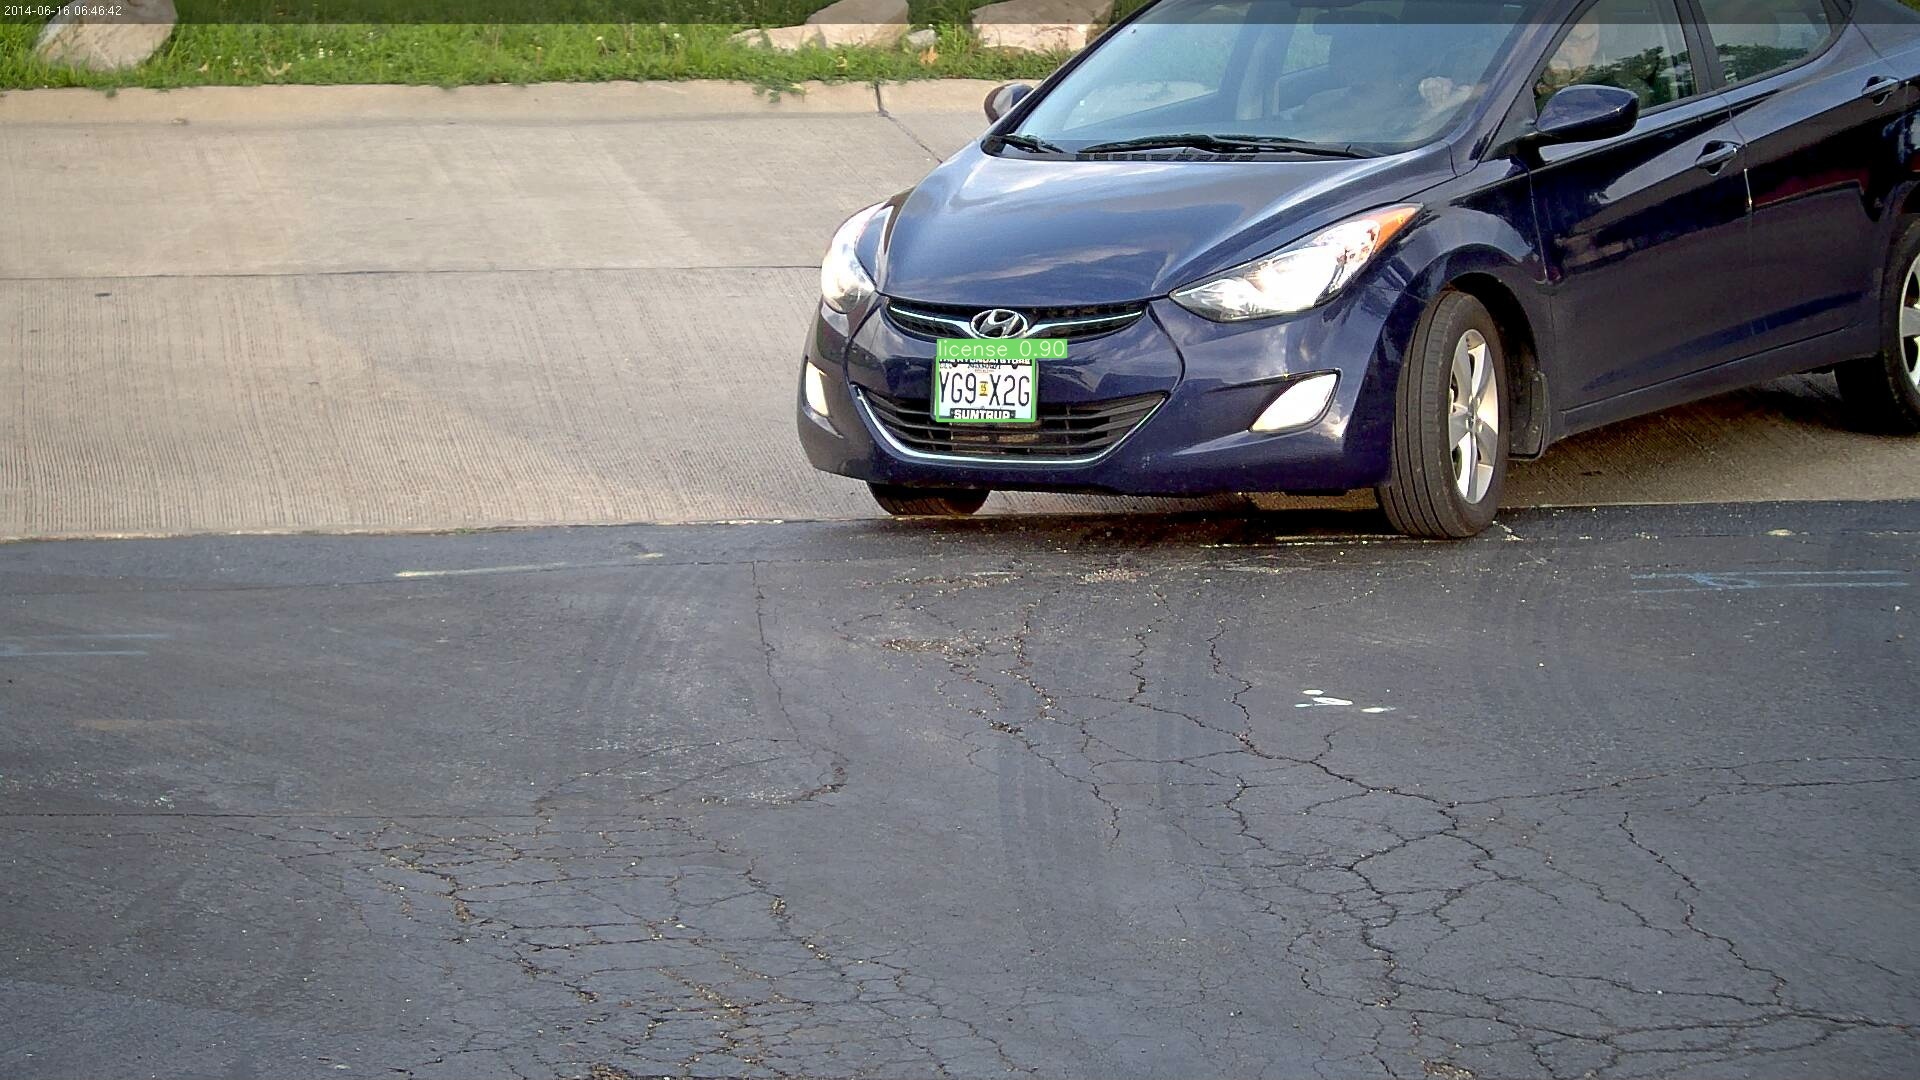

In [ ]:
Image('runs/detect/exp/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg')

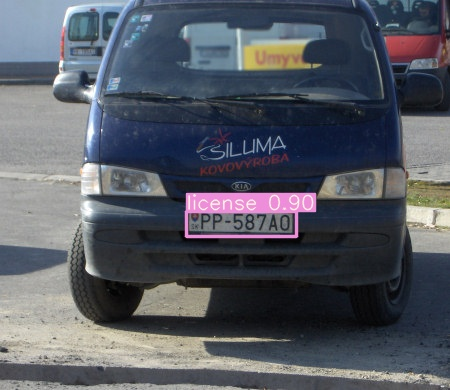

In [ ]:
Image('runs/detect/exp2/test_001.jpg')

In [ ]:
!ls runs/detect/exp/labels

0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.txt  wts-lg-000032.txt  wts-lg-000122.txt
1e241dc8-8f18-4955-8988-03a0ab49f813.txt  wts-lg-000033.txt  wts-lg-000123.txt
21d8c31d-3deb-494b-9c63-c0223306fd82.txt  wts-lg-000034.txt  wts-lg-000124.txt
22e54a62-57a8-4a0a-88c1-4b9758f67651.txt  wts-lg-000035.txt  wts-lg-000125.txt
316b64c0-55bf-4079-a1c0-d93f461a576f.txt  wts-lg-000036.txt  wts-lg-000126.txt
33fa5185-0286-4e8f-b775-46162eba39d4.txt  wts-lg-000037.txt  wts-lg-000127.txt
37170dd1-2802-4e38-b982-c5d07c64ff67.txt  wts-lg-000038.txt  wts-lg-000128.txt
3850ba91-3c64-4c64-acba-0c46b61ec0da.txt  wts-lg-000039.txt  wts-lg-000129.txt
4be2025c-09f7-4bb0-b1bd-8e8633e6dec1.txt  wts-lg-000040.txt  wts-lg-000130.txt
5b562a61-34ad-4f00-9164-d34abb7a38e4.txt  wts-lg-000041.txt  wts-lg-000131.txt
7fbfbe28-aecb-45be-bd05-7cf26acb3c5c.txt  wts-lg-000042.txt  wts-lg-000132.txt
c9368c55-210d-456c-a5ef-c310e60039ec.txt  wts-lg-000043.txt  wts-lg-000133.txt
car11.txt				  wts-lg-000044.txt  wts-lg-000134.txt


In [ ]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
         
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects

In [ ]:
!pip install pytesseract

     |████████████████████████████████| 4.3 MB 4.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
DETECT_PATH = '/content/yolov5/runs/detect/exp2'
IMG_NAME    = 'eu1'

In [ ]:
Image(DETECT_PATH+IMG_NAME+'.jpg')

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,633 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!pip install --ignore-installed Pillow==9.0.0

     |████████████████████████████████| 4.3 MB 4.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


316b64c0-55bf-4079-a1c0-d93f461a576f.jpg K17 9659

car11.jpg DG3HC8P|

car12.jpg  

po

car15.jpg TO KCSIM

ti

car19.jpg  

3182DKR

TT AMRORCHINI

car7.jpg ‘TODTHs

e VEHICLE MFRs

car9-5.jpg Ye803

Ai neou

cfaa9dd2-a388-4e92-bb3a-ae65c28d8139.jpg <LSiBGK

e73fd200-7ba4-4725-9d1d-2ec710864df6.jpg SF V=480
_ er |

us10.jpg    

  

_#&: @ WASHINGTON, DC @ == '

C= 2881

TAXATION WITHOUT REPRESEMMATION

  

 

us4.jpg 1 SArKansas” 1
520 MRK

us5.jpg NEYLDAND

wts-lg-000011.jpg NF2aygy|

wts-lg-000021.jpg PT eas TF
089282

wts-lg-000023.jpg Aue Tay

wts-lg-000026.jpg i Ort25

wts-lg-000033.jpg PK2:VEN

wts-lg-000034.jpg HKSERSC|

wts-lg-000035.jpg WR 374)

wts-lg-000036.jpg TIP 488

wts-lg-000040.jpg WD22R9B

wts-lg-000043.jpg FBBSRAT

 

wts-lg-000049.jpg WGAsL.2H

wts-lg-000061.jpg ASHEN

wts-lg-000069.jpg | THF 220.

wts-lg-000070.jpg rs |
84
wht} A

wts-lg-000073.jpg laVDA

wts-lg-000074.jpg AGB=VIN

 

wts-lg-000078.jpg BEZP63L

wts-lg-000080.jpg WDBHL

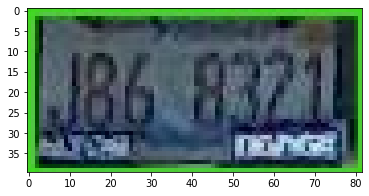

In [ ]:
import pytesseract
import shutil
import os
import cv2
import random
import matplotlib.pyplot as plt
import re
try:
 from PIL import Image
except ImportError:
 import Image

images_path = '/content/drive/MyDrive/btp-data/exp4_detect/'
labels_path = '/content/drive/MyDrive/btp-data/exp4_detect/labels'
for filename in os.listdir(images_path):
    f = os.path.join(images_path, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img = cv2.imread(os.path.join(images_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        try:
            lics = read_txt(os.path.join(labels_path, filename[:-3]+'txt'))
        except:
            continue
        for lic in lics:
            c, x, y, w, h = lic
            # print(x,y,w,h) # center of the bounding box
            img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
            plt.imshow(img_alpr)
            txt = pytesseract.image_to_string(img_alpr)
            if(len(re.sub(r'\W+', '', txt))>0):
                print(filename, txt)
                # plt.imshow(img_alpr)

#    img = cv2.putText(img, txt, (x-int(w/2),y-int(h/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)   

In [ ]:
!git clone https://github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV.git

Cloning into 'EAST-Detector-for-text-detection-using-OpenCV'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 46 (delta 0), reused 3 (delta 0), pack-reused 43
Unpacking objects: 100% (46/46), done.


601 335 66 41
0.5014529228210449


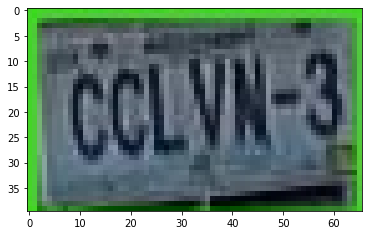

In [ ]:
import os, sys
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression

def east_detect(image):
    layerNames = [
    	"feature_fusion/Conv_7/Sigmoid",
    	"feature_fusion/concat_3"]
    
    orig = image.copy()
    
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    (H, W) = image.shape[:2]
    
    # set the new width and height and then determine the ratio in change
    # for both the width and height: Should be multiple of 32
    (newW, newH) = (320, 320)
    
    rW = W / float(newW)
    rH = H / float(newH)
    
    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))
    
    (H, W) = image.shape[:2]
    
    net = cv2.dnn.readNet("/content/EAST-Detector-for-text-detection-using-OpenCV/frozen_east_text_detection.pb")
    
    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    	(123.68, 116.78, 103.94), swapRB=True, crop=False)
    
    start = time.time()
    
    net.setInput(blob)
    
    (scores, geometry) = net.forward(layerNames)
    
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates that
        # surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
    
        for x in range(0, numCols):
    		# if our score does not have sufficient probability, ignore it
            # Set minimum confidence as required
            if scoresData[x] < 0.5:
                continue
    		# compute the offset factor as our resulting feature maps will
            #  x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            # extract the rotation angle for the prediction and then
            # compute the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])
                        
    boxes = non_max_suppression(np.array(rects), probs=confidences)
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in boxes:
    	# scale the bounding box coordinates based on the respective
    	# ratios
    	startX = int(startX * rW)
    	startY = int(startY * rH)
    	endX = int(endX * rW)
    	endY = int(endY * rH)
    	# draw the bounding box on the image
    	cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    
    print(time.time() - start)
    return orig

img = cv2.imread('/content/drive/MyDrive/btp-data/exp4_detect/1e241dc8-8f18-4955-8988-03a0ab49f813.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lics = read_txt('/content/drive/MyDrive/btp-data/exp4_detect/labels/1e241dc8-8f18-4955-8988-03a0ab49f813.txt')

for lic in lics:
    c, x, y, w, h = lic
    print(x,y,w,h) # center of the bounding box
    img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
    out_image = east_detect(img_alpr)
    plt.imshow(out_image) 
    cv2.imwrite("sample_output.jpg", out_image)

In [ ]:

!cp -rf /content/yolov5/runs/detect/exp4 /content/drive/MyDrive/btp-data

In [ ]:
!cp -rf /content/benchmarks/endtoend/us /content/drive/MyDrive/btp-data/ground

In [ ]:
!cp -rf /content/yolov5/runs/train/exp5  /content/drive/MyDrive/btp-data

In [ ]:
!cp -rf /content/yolov5/runs/detect/exp4 /content/drive/MyDrive/btp-data/predrain

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
         
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects
 
images=cv2.imread('/content/drive/MyDrive/btp-data/exp4_detect/1e241dc8-8f18-4955-8988-03a0ab49f813.jpg')
lics = read_txt('/content/drive/MyDrive/btp-data/exp4_detect/labels/1e241dc8-8f18-4955-8988-03a0ab49f813.txt')
c, x, y, w, h = lics[0]
#convert to grayscale image

img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
gray=cv2.cvtColor(img_alpr, cv2.COLOR_BGR2GRAY)
      
#memory usage with image i.e. adding image to memory
filename = "{}.jpg".format(os.getpid())
cv2.imwrite(filename, gray)
text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(text)
  
# show the output images
#cv2.imshow("Image Input", images)
#cv2.imshow("Output In Grayscale", gray)
#cv2.waitKey(0)